In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("diamonds.csv")

In [2]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
cols=["cut","color","clarity"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
y=df.price
x=df.carat

<AxesSubplot:>

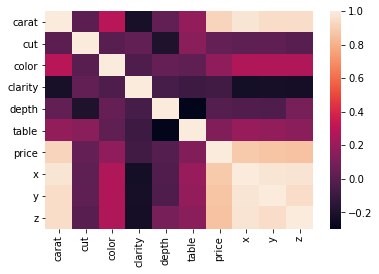

In [7]:
import seaborn as srn
srn.heatmap(df.corr())

In [8]:
x=df[["carat","x","y","z"]]
y=df.price

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=1,shuffle=True)

In [10]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(xtrain,ytrain)
print(svr.score(xtrain,ytrain))
print(svr.score(xtest,ytest))

0.6888919287646702
0.6825996462005353


In [11]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

0.994715508416543
0.7650371264032758


In [12]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
print(rfr.score(xtrain,ytrain))
print(rfr.score(xtest,ytest))

0.9783453595295504
0.8670169131133244


In [16]:
from sklearn.ensemble import VotingRegressor
vr=VotingRegressor(estimators=[("dtr",dtr),("rfr",rfr)])
vr.fit(xtrain,ytrain)
print(vr.score(xtrain,ytrain))
print(vr.score(xtest,ytest))

0.9906402723918775
0.8365230665095837
